# Build  spectra for AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : March 30th 2021
- creation update : March 31th 2021
- version v0


This notebook is to help for finding the position of order 0

# Imports

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [34]:
from iminuit import Minuit
import iminuit

In [35]:
iminuit.__version__

'2.2.0'

In [36]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

# Function

In [37]:
def file_target(filename):
    m=re.findall('^Cor_holo4_003_.*_(.*)_[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*[.]fits$',filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []

# Logbook for file selection

In [38]:
filename_logbook='logbooks/auxtellogbook_2021_v1.csv'

In [39]:
df=pd.read_csv(filename_logbook)

In [40]:
pd.set_option('display.max_rows', None)

In [41]:
df

,Unnamed: 0,index,date,path,file,num,object,filter,disperser,airmass,exposure,focus,seeing,pressure,temperature,humidity,windspd
0,0,0,2021-02-17T01:45:09.091,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_RG610_HD50896_2021-02-16_181.fits,181,HD50896,RG610,holo4_003,1.006209,90.0,-0.034843,NaN,743.10,10.3,51.0,9.3
1,1,1,2021-02-17T03:37:12.647,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_empty_HD50896_2021-02-16_209.fits,209,HD50896,empty_1,holo4_003,1.099905,90.0,0.000000,NaN,742.80,10.4,45.0,9.9
2,2,2,2021-02-18T07:25:02.387,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_350.fits,350,NGC4755,empty_1,holo4_003,1.158253,6.0,0.000000,NaN,742.30,8.8,53.0,7.3
3,3,3,2021-02-18T07:25:46.560,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_351.fits,351,NGC4755,empty_1,holo4_003,1.158097,6.0,0.000000,NaN,742.30,8.8,54.0,6.3
4,4,4,2021-02-18T07:26:07.146,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_352.fits,352,NGC4755,empty_1,holo4_003,1.158027,6.0,0.000000,NaN,742.30,8.8,54.0,6.3
5,5,5,2021-02-18T07:26:18.957,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_353.fits,353,NGC4755,empty_1,holo4_003,1.157987,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
6,6,6,2021-02-18T07:26:43.049,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_354.fits,354,NGC4755,empty_1,holo4_003,1.157907,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
7,7,7,2021-02-18T07:26:51.615,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_355.fits,355,NGC4755,empty_1,holo4_003,1.157879,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
8,8,8,2021-02-18T07:27:00.190,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_356.fits,356,NGC4755,empty_1,holo4_003,1.157851,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
9,9,9,2021-02-18T07:27:53.863,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_357.fits,357,NGC4755,empty_1,holo4_003,1.157723,6.0,0.000000,NaN,742.25,8.7,55.0,6.7


# Selection of input file

In [42]:
dir_spectra="/Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans"

In [43]:
#filename_image="Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits"

In [66]:
# 2021/03/31
#filename_image=df['file'][37] # 'Cor_holo4_003_empty_HD60753_2021-02-18_583.fits' reconstruit à moitié
#filename_image=df['file'][48] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_165.fits'
#filename_image=df['file'][50] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_167.fits'
#filename_image=df['file'][54] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_283.fits'
#filename_image=df['file'][55] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_284.fits' BAD image
#filename_image=df['file'][56] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_285.fits' BOUGE
#filename_image=df['file'][57] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_286.fits' BOUGE
#filename_image=df['file'][58] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_287.fits' BOUGE
#filename_image=df['file'][59] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_288.fits' BOUGE
#filename_image=df['file'][60] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_289.fits' BOUGE
#filename_image=df['file'][61] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_290.fits' PLANTE
#filename_image=df['file'][62] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_291.fits' BAD PSF
filename_image=df['file'][63] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_292.fits' GOOD
#filename_image=df['file'][64] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_293.fits' GOOD
#filename_image=df['file'][65] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_294.fits' GOOD
#filename_image=df['file'][66] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_295.fits' GOOD
#filename_image=df['file'][67] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits' GOOD
#filename_image=df['file'][68] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_297.fits' BAD PSF
#filename_image=df['file'][69] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_298.fits' BAD PSF
#filename_image=df['file'][70] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_299.fits' BAD PSF
#filename_image=df['file'][71] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_300.fits' BAD PSF
#filename_image=df['file'][72] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_301.fits' PLANTE
#filename_image=df['file'][73] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_302.fits' PLANTE
#filename_image=df['file'][74] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_303.fits' BAD FOCUS
#filename_image=df['file'][75] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_304.fits' BAD FOCUS

# 2021/04/01

#filename_image=df['file'][2] # 'Cor_holo4_003_NGC4755_2021-02-17_350.fits'  GOOD PSF
#filename_image=df['file'][3] # 'Cor_holo4_003_NGC4755_2021-02-17_351.fits'  GOOD PSF
#filename_image=df['file'][4] # 'Cor_holo4_003_NGC4755_2021-02-17_352.fits'  GOOD PSF
#filename_image=df['file'][5] # 'Cor_holo4_003_NGC4755_2021-02-17_353.fits'  GOOD PSF
#filename_image=df['file'][6] # 'Cor_holo4_003_NGC4755_2021-02-17_354.fits'  GOOD PSF
#filename_image=df['file'][7] # 'Cor_holo4_003_NGC4755_2021-02-17_355.fits'  GOOD PSF
#filename_image=df['file'][8] # 'Cor_holo4_003_NGC4755_2021-02-17_356.fits'  GOOD PSF
#filename_image=df['file'][9] # 'Cor_holo4_003_NGC4755_2021-02-17_357.fits'  GOOD PSF
#filename_image=df['file'][10] # 'Cor_holo4_003_NGC4755_2021-02-17_358.fits'  GOOD PSF
#filename_image=df['file'][11] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_556.fits'  GOOD PSF
#filename_image=df['file'][12] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_557.fits'  defocused, failed
#filename_image=df['file'][13] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_558.fits'  defocused, failed
#filename_image=df['file'][14] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_559.fits'  good, but central star
#filename_image=df['file'][15] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_560.fits'  bad psf, but looks good
#filename_image=df['file'][16] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_561.fits'  Very good
#filename_image=df['file'][17] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_562.fits'  Very good
#filename_image=df['file'][18] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_563.fits'  Very good
#filename_image=df['file'][19] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_564.fits'  Fit bizare
#filename_image=df['file'][20] # 'Cor_holo4_003_empty_HD60753_2021-02-18_566.fits'  Very good
#filename_image=df['file'][21] # 'Cor_holo4_003_empty_HD60753_2021-02-18_567.fits'  Good psf, but rec failed order1/2 separated
#filename_image=df['file'][22] # 'Cor_holo4_003_empty_HD60753_2021-02-18_568.fits'  Good psf,  order1/2 separated
#filename_image=df['file'][23] # 'Cor_holo4_003_empty_HD60753_2021-02-18_569.fits'  Good psf,  order1/2 separ
#filename_image=df['file'][24] # 'Cor_holo4_003_empty_HD60753_2021-02-18_570.fits'  Good psf,  order1/2 separ
#filename_image=df['file'][25] # 'Cor_holo4_003_empty_HD60753_2021-02-18_571.fits'  Good psf, failed , order1/2 separ
#filename_image=df['file'][26] # 'Cor_holo4_003_empty_HD60753_2021-02-18_572.fits'  Good psf, good rec,order1/2 separ
#filename_image=df['file'][27] # 'Cor_holo4_003_empty_HD60753_2021-02-18_573.fits'  Bad psf, order1/2 separ
#filename_image=df['file'][28] # 'Cor_holo4_003_empty_HD60753_2021-02-18_574.fits'  Bad psf, order1/2 separ
#filename_image=df['file'][29] # 'Cor_holo4_003_empty_HD60753_2021-02-18_575.fits'   Bad psf, order1/2 separ
#filename_image=df['file'][30] # 'Cor_holo4_003_empty_HD60753_2021-02-18_576.fits'   Bad psf, order1/2 separ
#filename_image=df['file'][31] # 'Cor_holo4_003_empty_HD60753_2021-02-18_577.fits'   Bad psf, order1/2 separ
#filename_image=df['file'][32] # 'Cor_holo4_003_empty_HD60753_2021-02-18_578.fits'   Bad psf, order1/2 separ
#filename_image=df['file'][33] # 'Cor_holo4_003_empty_HD60753_2021-02-18_579.fits'   Bad psf, order1/2 separ
#filename_image=df['file'][34] # 'Cor_holo4_003_empty_HD60753_2021-02-18_580.fits'   Bad psf, order1/2 separ
#filename_image=df['file'][35] # 'Cor_holo4_003_empty_HD60753_2021-02-18_581.fits'   Bad psf, order1/2 separ, bad rec ?
#filename_image=df['file'][36] # 'Cor_holo4_003_empty_HD60753_2021-02-18_582.fits'   Bad psf, order1/2 separ, bad rec ?
#filename_image=df['file'][37] # 'Cor_holo4_003_empty_HD60753_2021-02-18_583.fits'   Bad psf, order1/2 separ, bad rec ?
#filename_image=df['file'][38] # 'Cor_holo4_003_empty_HD60753_2021-02-18_584.fits'   Bad psf, order1/2 separ, bad rec ?
#filename_image=df['file'][39] # 'Cor_holo4_003_empty_HD60753_2021-02-18_585.fits'   Bad psf, order1/2 separ, bad rec
#filename_image=df['file'][40] # 'Cor_holo4_003_empty_HD60753_2021-02-18_586.fits'   Bad psf, order1/2 separ, good rec 
#filename_image=df['file'][41] # 'Cor_holo4_003_empty_HD60753_2021-02-18_587.fits'   Bad psf, order1/2 separ, good rec
#filename_image=df['file'][42] # 'Cor_holo4_003_empty_HD60753_2021-02-18_588.fits'   Bad Focus, order1/2 separ, good rec
#filename_image=df['file'][43] # 'Cor_holo4_003_empty_HD60753_2021-02-18_590.fits'   NOTHING Bad Focus, order1/2 separ, good rec
#filename_image=df['file'][44] # 'Cor_holo4_003_RG610_HD114449_2021-02-18_591.fits'   BAD Not focued
#filename_image=df['file'][45] # 'Cor_holo4_003_RG610_HD114449_2021-02-18_592.fits'   BAD Not focued
#filename_image=df['file'][46] # 'Cor_holo4_003_RG610_HD114449_2021-02-18_593.fits'   BAD Not focued
#filename_image=df['file'][47] # 'Cor_holo4_003_RG610_HD114449_2021-02-18_594.fits'   BAD Not focued
#filename_image=df['file'][48] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_165.fits'   BAD Not focued
#filename_image=df['file'][49] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_166.fits'   bad psf + rec OK
#filename_image=df['file'][50] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_167.fits'   bad psf + rec OK
#filename_image=df['file'][51] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_191.fits'   bad psf + rec OK
#filename_image=df['file'][52] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_192.fits'   bad psf + rec OK
#filename_image=df['file'][53] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_193.fits'   bad psf + rec OK
#filename_image=df['file'][54] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_283.fits'   bad psf + rec OK
#filename_image=df['file'][55] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_284.fits'   bad psf + rec OK
#filename_image=df['file'][56] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_285.fits'   bad focus bad psf + rec OK
#filename_image=df['file'][57] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_286.fits'   bad focus bad psf + rec OK

In [67]:
filename_image

'Cor_holo4_003_RG610_HD75519_2021-03-11_292.fits'

In [68]:
file_target(filename_image)

['HD75519']

In [69]:
filename=os.path.join(dir_spectra,filename_image)
output_directory="./outputs/"
guess = [250,2600]
disperser_label = "holo4_003"
config = "config/auxtel_quicklook.ini"
#config = "config/auxtel.ini"
target = file_target(filename_image)[0]

In [48]:
#spectractor_dir="/Users/dagoret/MacOSX/GitHub/LSST/SpectractorNew/spectractor"

# Configuration of the running mode

In [70]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [50]:
#parameters.DISPERSER_DIR = os.path.join(spectractor_dir, "extractor/dispersers/")
#parameters.CONFIG_DIR = os.path.join(spectractor_dir, "../config/")
#parameters.THROUGHPUT_DIR = os.path.join(spectractor_dir, "simulation/CTIOThroughput/")

# Load an image

In [71]:
image=Image(file_name=filename, target_label=target, disperser_label=disperser_label, config=config)

Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-04-02 14:31:09  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_RG610_HD75519_2021-03-11_292.fits...
2021-04-02 14:31:09  Image      load_AUXTEL_image    INFO   
	Image loaded
2021-04-02 14:31:10  Image      load_image           INFO   
	Loading disperser holo4_003...
2021-04-02 14:31:10  Hologram   load_specs           INFO   
	Load disperser holo4_003:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/holo4_003
2021-04-02 14:31:10  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 156.00 +/- 1.00 grooves/mm
	Average tilt of -0.3 degrees
2021-04-02 14:31:15  TelescopeTransmission reset_lambda_range   INFO   
	With filter RG610, set parameters.LAMBDA_MIN=563 and parameters.LAMBDA_MAX=1095.
2021-04-02 14:31:15  Star       load                 INFO   
	Simbad:
 MAIN_ID        RA           DEC      ... PM_ERR_MINA_5 PM_ER

## Show relevant parameters

In [52]:
parameters.OBS_NAME

'AUXTEL'

In [53]:
parameters.DISPERSER_DIR

'/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/'

In [54]:
parameters.DISTANCE2CCD

174.9980010986328

In [55]:
parameters.LAMBDA_MIN 

563

In [56]:
parameters.LAMBDA_MAX 

1095

In [57]:
parameters.LSST_SAVEFIGPATH=True
parameters.LSST_SAVEFIGPATH="figures"

In [58]:
image.filter_label

'RG610'

In [59]:
image.header["FILTER"]

'RG610'

In [72]:
image.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'LSST DM Header Service'                                              
TIMESYS = 'TAI     '                                                            
DATE    = '2021-03-12T02:51:16.058'                                             
DATE-OBS= '2021-03-12T02:51:16.058'                                             
DATE-BEG= '2021-03-12T02:51:25.196'                                             
DATE-END= '2021-03-12T02:51:50.431'                                             
MJD     =     59285.1189358566                                                  
MJD-OBS =     59285.1190416172                                                  
MJD-BEG =     59285.11904161

# Plot image and find the target position

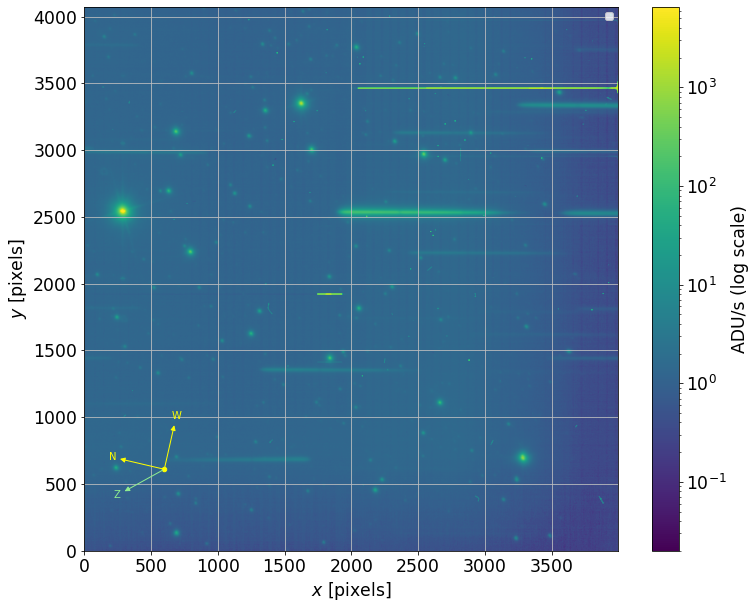

In [73]:
image.plot_image(figsize=(12, 10),scale="log")

In [61]:
#alert False

2021-04-02 14:31:53  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                 c1_0                 c0_1        
    ------------------ --------------------- --------------------
    3.6088553386357303 -0.009635485294250484 0.036931699399400615
2021-04-02 14:31:54  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 14 iterations because the relative change of cost is below ftol=1.25e-05.


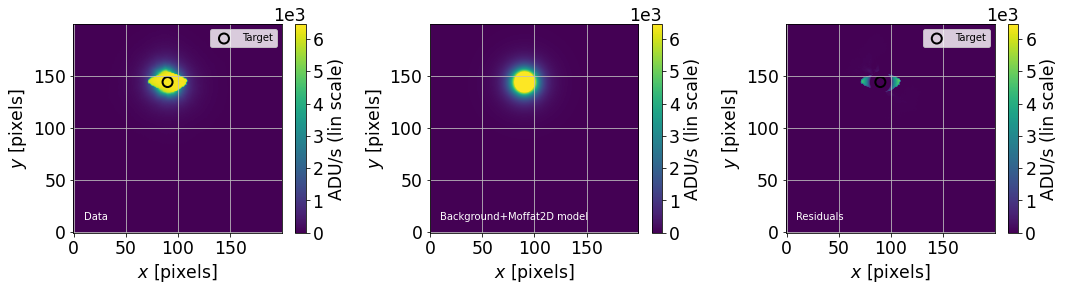

2021-04-02 14:31:55  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 2 iterations because the relative change of cost is below ftol=5e-05.


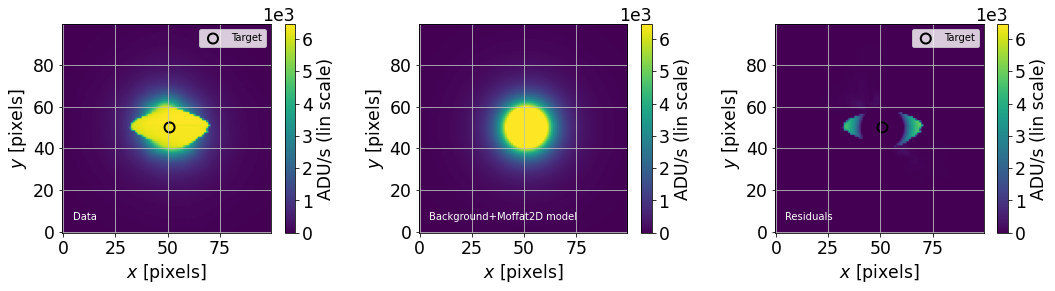

2021-04-02 14:31:56  Image      find_target          INFO   
	X,Y target position in pixels: 289.957,2544.001


In [74]:
#guess = [2000, 2800]
#guess = [400, 2700] # filename_image=df['file'][37] : Cor_holo4_003_empty_HD60753_2021-02-18_583.fits'
#guess = [300, 2300] #filename_image=df['file'][50] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_167.fits'
#guess = [300, 2500] #filename_image=df['file'][54] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_283.fits'
#guess = [300, 2500] #filename_image=df['file'][55] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_284.fits' BAD image
#guess = [300, 2500]  #filename_image=df['file'][56] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_285.fits' MOVED
#guess = [300, 2500]  #filename_image=df['file'][57] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_286.fits' MOVED
#guess = [300, 2500]  #filename_image=df['file'][58] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_287.fits' MOVED
#guess = [300, 2500]  #filename_image=df['file'][59] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_288.fits' BAD PSF
#guess = [300, 2500]  #filename_image=df['file'][60] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_289.fits' BAD PSF
#guess = [300, 2500]  #filename_image=df['file'][61] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_290.fits' PLANTE
#guess = [300, 2500]  #filename_image=df['file'][62] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_291.fits' BAD PSF
guess = [300, 2500]  #filename_image=df['file'][63] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_292.fits'  GOOD
#guess = [300, 2500]  #filename_image=df['file'][64] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_293.fits' GOOD
#guess = [300, 2500]  #filename_image=df['file'][65] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_294.fits' GOOD
#guess = [300, 2600]  #filename_image=df['file'][66] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_295.fits' GOOD
#guess = [300, 2600]  #filename_image=df['file'][67] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits' GOOD
#guess = [300, 2600]  #filename_image=df['file'][68] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_297.fits' BAD PSF
#guess = [300, 2600]  #filename_image=df['file'][69] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_298.fits' BAD PSF
#guess = [300, 2600]  #filename_image=df['file'][70] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_299.fits' BAD PSF
#guess = [300, 2600]  #filename_image=df['file'][71] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_300.fits' BAD PSF
#guess = [300, 2600]  #filename_image=df['file'][72] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_301.fits' PLANTE
#guess = [300, 2600]  #filename_image=df['file'][73] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_302.fits' PLANTE
#guess = [300, 2600]  #filename_image=df['file'][74] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_303.fits' TOO BAD FOCUS
#guess = [300, 2600]  #filename_image=df['file'][75] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_304.fits' TOO BAD FOCUS


#guess = [750, 2700] #filename_image=df['file'][2] # 'Cor_holo4_003_NGC4755_2021-02-17_350.fits' GOOD PSF 
#guess = [750, 2700] #filename_image=df['file'][3] # 'Cor_holo4_003_NGC4755_2021-02-17_351.fits' GOOD PSF 
#guess = [750, 2700] #filename_image=df['file'][4] # 'Cor_holo4_003_NGC4755_2021-02-17_352.fits' GOOD PSF 
#guess = [750, 2700] #filename_image=df['file'][5] # 'Cor_holo4_003_NGC4755_2021-02-17_353.fits' GOOD PSF 
#guess = [750, 2700] #filename_image=df['file'][6] # 'Cor_holo4_003_NGC4755_2021-02-17_354.fits' GOOD PSF 
#guess = [750, 2700] #filename_image=df['file'][7] # 'Cor_holo4_003_NGC4755_2021-02-17_355.fits' GOOD PSF
#guess = [750, 2700] #filename_image=df['file'][8] # 'Cor_holo4_003_NGC4755_2021-02-17_356.fits' GOOD PSF
#guess = [700, 1700] #filename_image=df['file'][9] # 'Cor_holo4_003_NGC4755_2021-02-17_357.fits' GOOD PSF
#guess = [500, 1800] #filename_image=df['file'][10] # 'Cor_holo4_003_NGC4755_2021-02-17_358.fits' GOOD PSF
#guess = [300, 2500] #filename_image=df['file'][11] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_556.fits'  GOOD PSF
#guess = [400, 2600] #filename_image=df['file'][12] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_557.fits'  Defocused, failed
#guess = [350, 2600] #filename_image=df['file'][13] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_558.fits' Defoc, failed
#guess = [1800, 2500] #filename_image=df['file'][14] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_559.fits' Good, but central star
#guess = [400, 2500] #filename_image=df['file'][15] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_560.fits' bad psf, but seems good
#guess = [400, 2500] #filename_image=df['file'][16] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_561.fits' GOOD PSF
#guess = [400, 2500] #filename_image=df['file'][17] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_562.fits' GOOD PSF
#guess = [400, 2500] #filename_image=df['file'][18] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_563.fits' GOOD PSF
#guess = [400, 2500] #filename_image=df['file'][19] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_564.fits' GOOD PSF, FIT BIZARRE

#guess = [400, 2600] #filename_image=df['file'][20] # 'Cor_holo4_003_empty_HD60753_2021-02-18_566.fits' GOOD PSF
#guess = [400, 2600] #filename_image=df['file'][21] # 'Cor_holo4_003_empty_HD60753_2021-02-18_567.fits' GOOD PSF, rec failed order1/2 separated
#guess = [400, 2600] #filename_image=df['file'][22] # 'Cor_holo4_003_empty_HD60753_2021-02-18_568.fits' GOOD PSF, rec , order1/2 separated
#guess = [400, 2600] #filename_image=df['file'][23] # 'Cor_holo4_003_empty_HD60753_2021-02-18_569.fits' GOOD PSF, good rec, order1/2 separated on plate
#guess = [400, 2600] #filename_image=df['file'][24] # 'Cor_holo4_003_empty_HD60753_2021-02-18_570.fits' GOOD PSF, good rec, order1/2 separated on plate
#guess = [400, 2600] #filename_image=df['file'][25] # 'Cor_holo4_003_empty_HD60753_2021-02-18_571.fits' GOOD PSF, failed rec, order1/2 separated on plate
#guess = [400, 2600] #filename_image=df['file'][26] # 'Cor_holo4_003_empty_HD60753_2021-02-18_572.fits' GOOD PSF, good rec, order1/2 separated on plate
#guess = [400, 2600] #filename_image=df['file'][27] # 'Cor_holo4_003_empty_HD60753_2021-02-18_573.fits' BAD PSF, rec, order1/2 separated on plate
#guess = [400, 2700] #filename_image=df['file'][28] # 'Cor_holo4_003_empty_HD60753_2021-02-18_574.fits' BAD PSF, rec, order1/2 separa
#guess = [400, 2700] #filename_image=df['file'][29] # 'Cor_holo4_003_empty_HD60753_2021-02-18_575.fits' BAD PSF, rec, order1/2 separa
#guess = [400, 2700] #filename_image=df['file'][30] # 'Cor_holo4_003_empty_HD60753_2021-02-18_576.fits' BAD PSF, rec, order1/2 separa
#guess = [400, 2700] #filename_image=df['file'][31] # 'Cor_holo4_003_empty_HD60753_2021-02-18_577.fits' BAD PSF, rec, order1/2 separa
#guess = [400, 2700] #filename_image=df['file'][32] # 'Cor_holo4_003_empty_HD60753_2021-02-18_578.fits' BAD PSF, rec, order1/2 separa
#guess = [400, 2700] #filename_image=df['file'][33] # 'Cor_holo4_003_empty_HD60753_2021-02-18_579.fits' BAD PSF, rec, order1/2 separa
#guess = [400, 2700] #filename_image=df['file'][34] # 'Cor_holo4_003_empty_HD60753_2021-02-18_580.fits' BAD PSF, rec, order1/2 separa
#guess= [400, 2700] #filename_image=df['file'][35] # 'Cor_holo4_003_empty_HD60753_2021-02-18_581.fits' BAD PSF, rec, order1/2 separa
#guess= [400, 2700] #filename_image=df['file'][36] # 'Cor_holo4_003_empty_HD60753_2021-02-18_582.fits' BAD PSF, probably bad rec, order1/2 separa
#guess= [400, 2700] #filename_image=df['file'][37] # 'Cor_holo4_003_empty_HD60753_2021-02-18_583.fits' BAD PSF, probably bad rec, order1/2 separa
#guess= [400, 2700] #filename_image=df['file'][38] # 'Cor_holo4_003_empty_HD60753_2021-02-18_584.fits' BAD PSF, probably bad rec, order1/2 separa
#guess= [400, 2700] #filename_image=df['file'][39] # 'Cor_holo4_003_empty_HD60753_2021-02-18_585.fits' BAD PSF, probably good rec, order1/2 separa
#guess= [400, 2700] #filename_image=df['file'][40] # 'Cor_holo4_003_empty_HD60753_2021-02-18_586.fits' BAD PSF, Good rec, order1/2 separa
#guess= [1900, 2900] #filename_image=df['file'][41] # 'Cor_holo4_003_empty_HD60753_2021-02-18_587.fits' BAD PSF, Good rec, order1/2 separa, inutile
#guess= [1900, 2900] #filename_image=df['file'][42] # 'Cor_holo4_003_empty_HD60753_2021-02-18_588.fits' BAD FOCUS, Good rec, order1/2 separa, inutile
#guess= [1900, 2900] #filename_image=df['file'][43] # 'Cor_holo4_003_empty_HD60753_2021-02-18_590.fits' NOTHING BAD FOCUS, Good rec, order1/2 separa, inutile
#guess= [1900, 2900] #filename_image=df['file'][44] # '# 'Cor_holo4_003_RG610_HD114449_2021-02-18_591.fits' BAD FOCUS
#guess= [1900, 2900] #filename_image=df['file'][45] # '# 'Cor_holo4_003_RG610_HD114449_2021-02-18_592.fits'

#guess= [1900, 2900] #filename_image=df['file'][46] # 'Cor_holo4_003_RG610_HD114449_2021-02-18_593.fits'   BAD Not focued
#guess= [1900, 2900] #filename_image=df['file'][47] # 'Cor_holo4_003_RG610_HD114449_2021-02-18_594.fits'   BAD Not focued
#guess= [1900, 2900] #filename_image=df['file'][48] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_165.fits'   BAD Not focued
#guess= [200, 2400] #filename_image=df['file'][49] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_166.fits'   bad psf , good reconstruction
#guess= [300, 2300] #filename_image=df['file'][50] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_167.fits'   bad psf , good reconstruction

#guess= [1700, 2300] #filename_image=df['file'][51] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_191.fits'   bad psf + rec OK
#guess= [1700, 2300] #filename_image=df['file'][52] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_192.fits'   bad psf + rec OK
#guess= [1700, 2300] #filename_image=df['file'][53] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_193.fits'   bad psf + rec OK
#guess= [250, 2500] #filename_image=df['file'][54] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_194.fits'   bad focus,very bad psf + bad rec 

#guess= [250, 2500] #filename_image=df['file'][55] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_195.fits'   bad focus,very bad psf + bad rec 
#guess= [250, 2500] #filename_image=df['file'][56] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_196.fits'   bad focus,very bad psf + bad rec 



parameters.VERBOSE = True
parameters.DEBUG = True
x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)

In [75]:
print(x1,y1)

289.9570339319632 2544.000630498847


# Go for spectrum reconstruction

2021-04-02 14:32:10  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR


Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-04-02 14:32:11  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_RG610_HD75519_2021-03-11_292.fits...
2021-04-02 14:32:11  Image      load_AUXTEL_image    INFO   
	Image loaded
2021-04-02 14:32:11  Image      load_image           INFO   
	Loading disperser holo4_003...
2021-04-02 14:32:11  Hologram   load_specs           INFO   
	Load disperser holo4_003:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/holo4_003
2021-04-02 14:32:11  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 156.00 +/- 1.00 grooves/mm
	Average tilt of -0.3 degrees
2021-04-02 14:32:17  TelescopeTransmission reset_lambda_range   INFO   
	With filter RG610, set parameters.LAMBDA_MIN=563 and parameters.LAMBDA_MAX=1095.
2021-04-02 14:32:17  Star       load                 INFO   
	Simbad:
 MAIN_ID        RA           DEC      ... PM_ERR_MINA_6 PM_ER

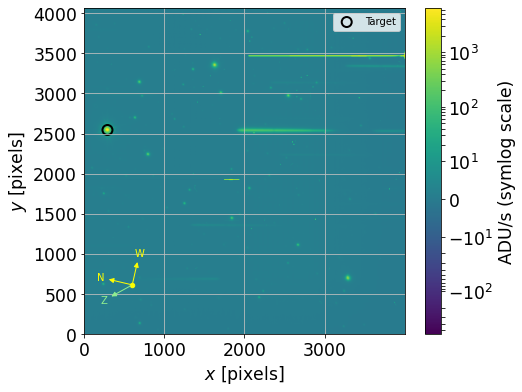

2021-04-02 14:32:21  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[ 289.95703393 2544.0006305 ]...
2021-04-02 14:32:21  spectractor.extractor.images find_target          INFO   
	No WCS /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_RG610_HD75519_2021-03-11_292_wcs/Cor_holo4_003_RG610_HD75519_2021-03-11_292.wcs available, use 2D fit to find target pixel position.
2021-04-02 14:32:21  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0                   c0_1         
    ----------------- -------------------- -----------------------
    7.526792715741356 0.000554066723316335 -0.00022239451116636306
2021-04-02 14:32:22  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 12 iterations because the relative change of cost is below ftol=1.25e-05.


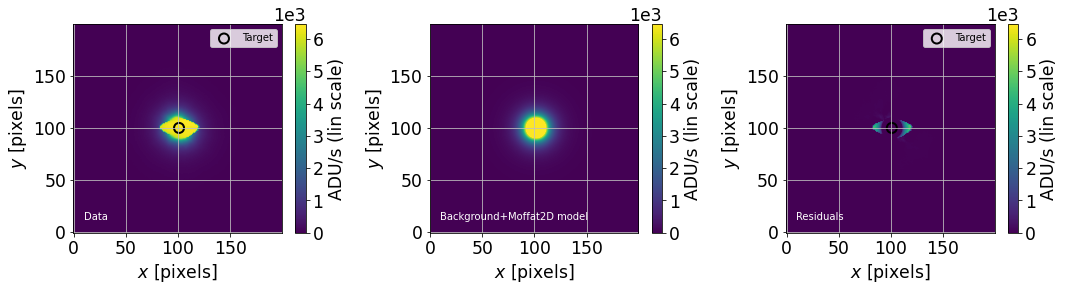

2021-04-02 14:32:23  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 3 iterations because the relative change of cost is below ftol=5e-05.


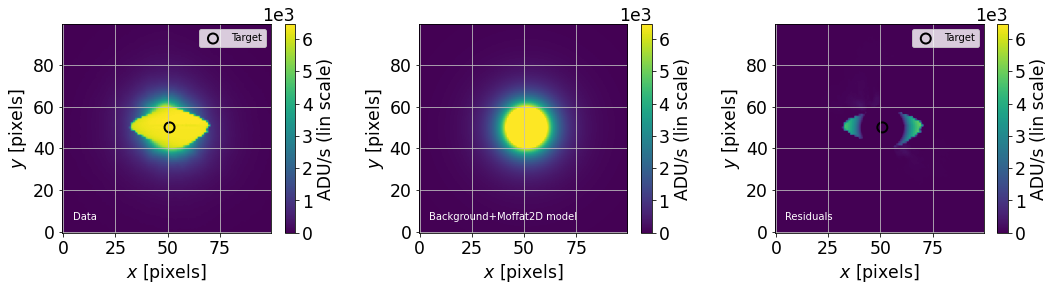

2021-04-02 14:32:25  Image      find_target          INFO   
	X,Y target position in pixels: 289.952,2544.010


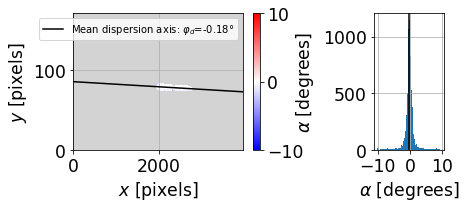

2021-04-02 14:32:26  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.18 degree
/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


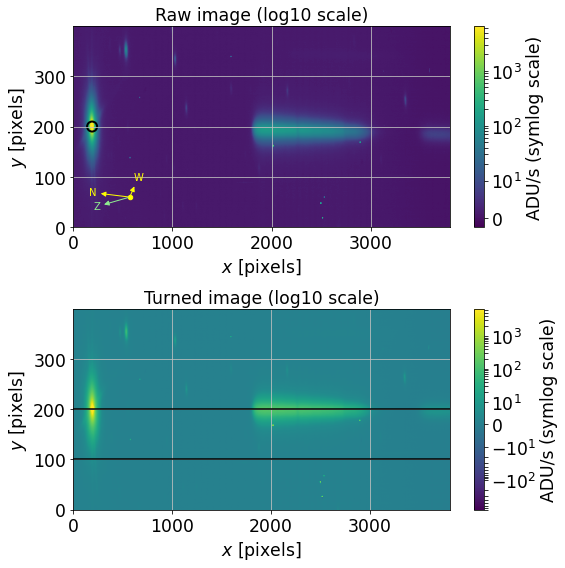

2021-04-02 14:32:39  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the rotated image...
2021-04-02 14:32:39  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0               c0_1       
    ----------------- ------------------- ------------------
    72.47895059173878 0.08916258944334154 0.0721586528020404
2021-04-02 14:32:39  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 6 iterations because the relative change of cost is below ftol=5e-05.


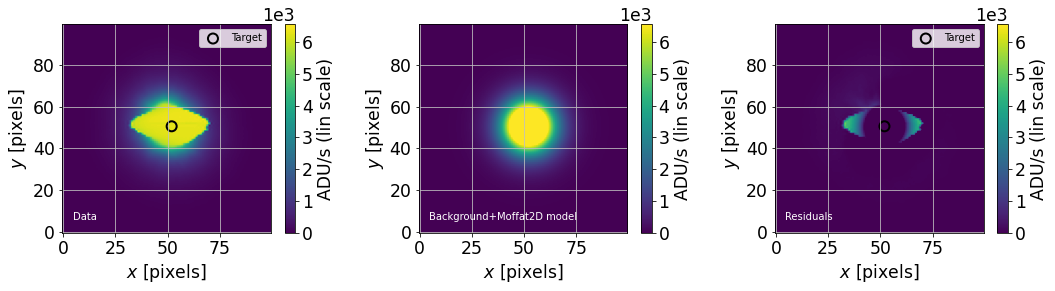

2021-04-02 14:32:40  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 3 iterations because the relative change of cost is below ftol=0.0002.


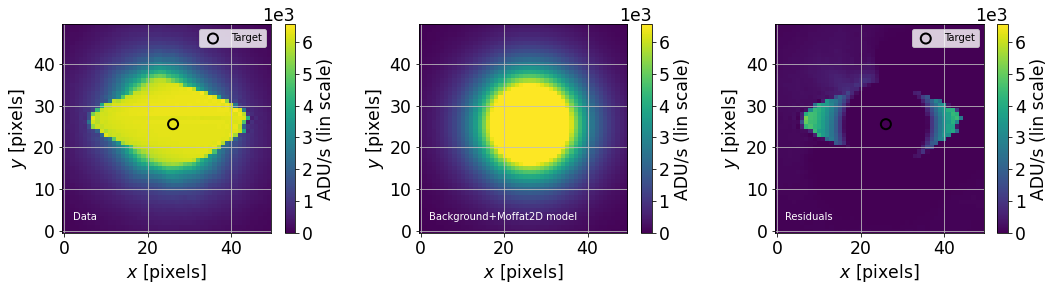

2021-04-02 14:32:41  Image      find_target          INFO   
	X,Y target position in pixels: 296.072,2544.531
2021-04-02 14:32:41  Spectrum   __init__             INFO   
	Spectrum info copied from image
2021-04-02 14:32:41  TelescopeTransmission reset_lambda_range   INFO   
	With filter RG610, set parameters.LAMBDA_MIN=565.0000000000005 and parameters.LAMBDA_MAX=1089.8000000001198.
2021-04-02 14:32:41  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*20 pixels and background from 140 to 180 pixels
2021-04-02 14:32:41  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop rotated image [1844:3315,2364:2724] (size (1471, 360))


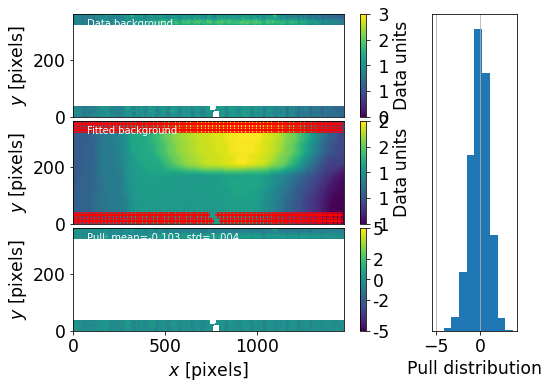

2021-04-02 14:32:45  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Start PSF1D transverse fit...
/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/chromaticpsf.py:764: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  ax[0].set_yscale('symlog', linthresh=10)
/Users/dagoret/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/Users/dagoret/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/dagoret/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a mask

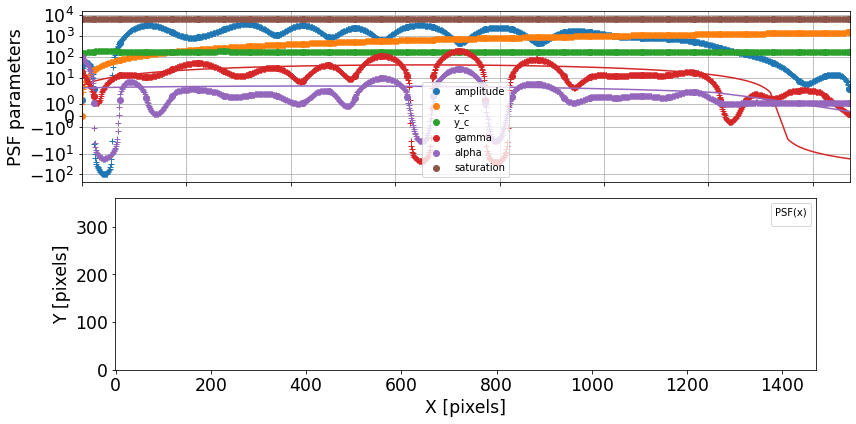

2021-04-02 14:33:09  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=1.2266e+06 initial chisq_red=20.846
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [ 0.20336459  0.0442143   0.42209362 -1.88578839  2.93160522 -2.04876133
 -0.8130083  -1.24105433 -1.96611032]
	New parameters: [-1.83874231 -0.79716243 -0.31479611  9.27217552 -6.34710903 -6.97456954
  0.95705455 -1.23751149 -1.49324892]
	Final cost=3.0604e+05 final chisq_red=5.2012 computed in 1.90s
2021-04-02 14:33:11  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=3.0604e+05 initial chisq_red=5.2012
		 Line search: alpha_min=1.62 iter=1 funcalls=5
	Parameter shifts: [0.1488125  0.24403624 0.25533797 1.90685597 2.37743119 2.34633522
 0.47685331 0.76805708 0.78766179]
	New parameters: [-1.68992982 -0.55312619 -0.05945814 11.17903149 -3.96967784 -4.62823432
  1.43390786 -0.46945441 -0.70558713]
	Final cost=1.3959e+05 final chisq_red=2.3723 computed in 1.48

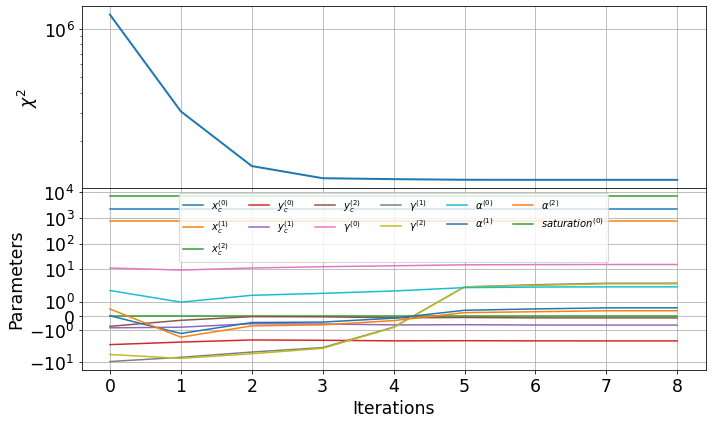

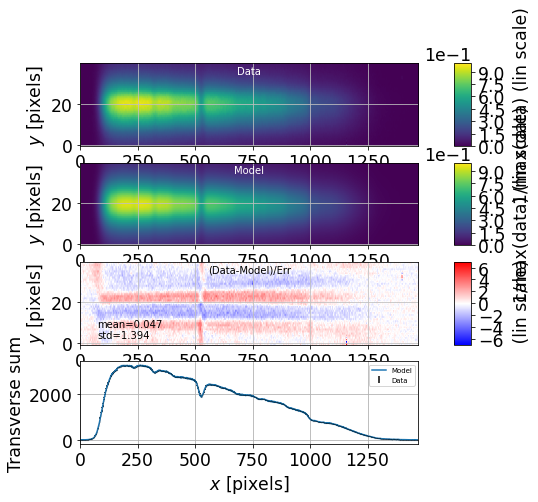

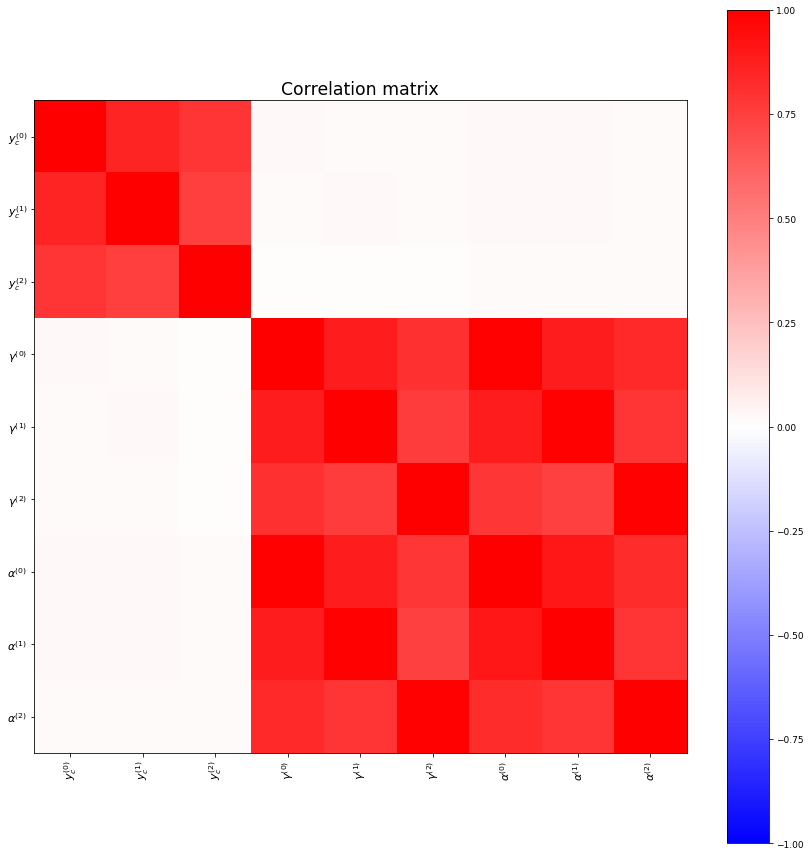

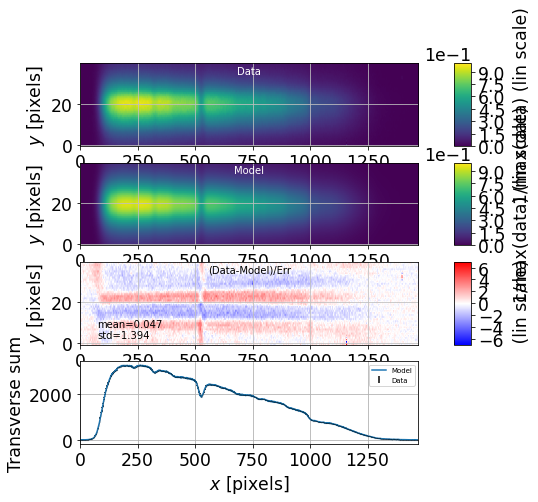

2021-04-02 14:33:30  spectractor.extractor.extractor extract_spectrum_from_image DEBUG  
	Transverse fit table before derotation:
     amplitude        x_c   ...          Dy         Dy_disp_axis
-------------------- ------ ... ------------------- ------------
  -4.869625708417807    0.0 ...  -1.255392116758685          0.0
 -2.0418636869646978    1.0 ... -1.2556719865471564          0.0
  0.6662550966078005    2.0 ... -1.2559526766163174          0.0
-0.11302003456699859    3.0 ... -1.2562341869661964          0.0
   4.901848630679557    4.0 ... -1.2565165175967934          0.0
  -0.408598691909992    5.0 ... -1.2567996685080516          0.0
   6.721672273716777    6.0 ... -1.2570836397000278          0.0
   8.765432457852368    7.0 ... -1.2573684311726936          0.0
   9.719075252208544    8.0 ... -1.2576540429260774          0.0
   6.147026459955604    9.0 ... -1.2579404749601508          0.0
                 ...    ... ...                 ...          ...
  2.7420519264116603 1460

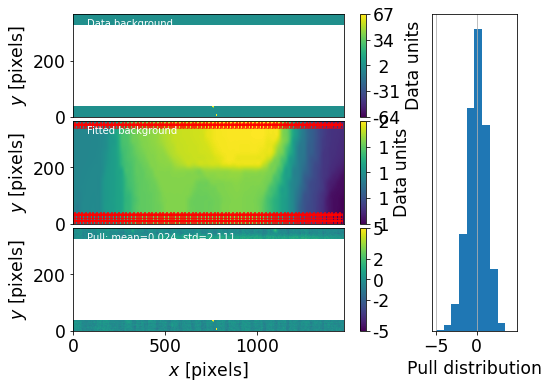

2021-04-02 14:33:34  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Background statistics: mean=1.376 ADU/s, RMS=0.412 ADU/s.
2021-04-02 14:33:34  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop image [1836:3307,2355:2721] (size (1471, 366))
	New target position in spectrogram frame: [-1546.0479049003306, 189.00992412146888]


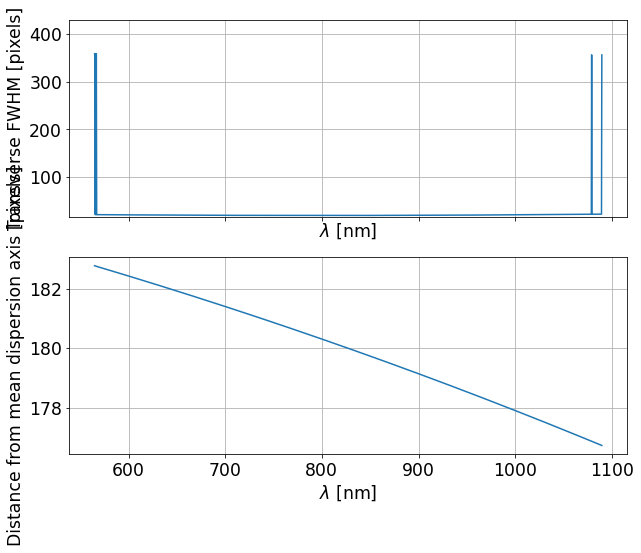

/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


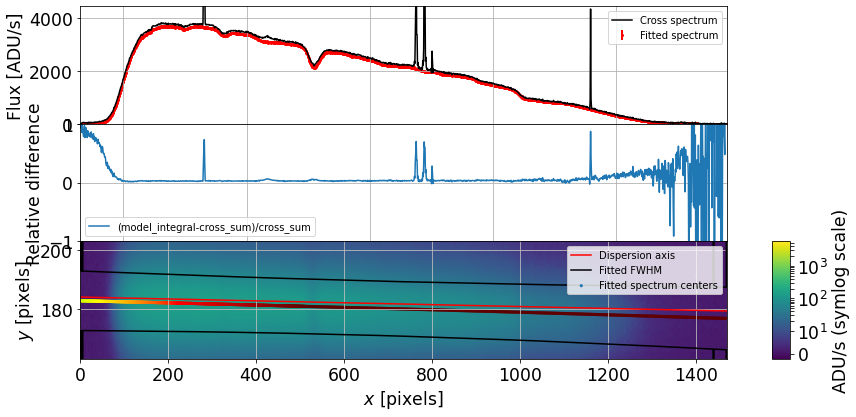

2021-04-02 14:33:36  spectractor.extractor.extractor Spectractor          INFO   
	Calibrating order 1 spectrum...


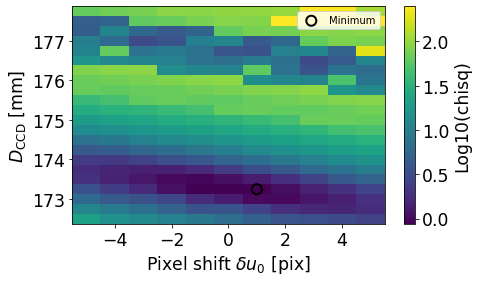

spectrum/calibrate_spectrum::pixel_shift_step= 1.0
spectrum/calibrate_spectrum::parameters.DISTANCE2CCD_ERR= 0.5
spectrum/calibrate_spectrum::error= (0.5, 1.0)
spectrum/calibrate_spectrum::start= [173.2480011   1.       ]


2021-04-02 14:33:57  Spectrum   calibrate_spectrum   INFO   
	Order0 total shift: 0.045pix
	D = 173.344 mm (default: DISTANCE2CCD = 175.00 +/- 0.50 mm, -3.3 sigma shift)
2021-04-02 14:33:57  astropy    _showwarning         WARNING VerifyWarning: Card is too long, comment will be truncated.
2021-04-02 14:33:57  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_292_spectrum.fits
2021-04-02 14:33:57  Spectrum   save_spectrogram     INFO   
	Spectrogram saved in ./outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_292_spectrogram.fits


   Line   Tabulated  Detected    Shift    ...   Chisq   Eqwidth_mod Eqwidth_data
              nm        nm         nm     ...  reduced       nm          nm     
--------- --------- --------- ----------- ... --------- ----------- ------------
$H\alpha$  656.3486  656.0637  -0.2848594 ... 0.8483061  0.24770129   0.24680384
 $O_2(B)$   687.472 687.87494  0.40293396 ... 0.7496761   0.5245329    0.5191526
              760.3  759.8859 -0.41409934 ... 1.0813583   1.0894475    2.4453661
    $O_2$     763.1 763.50214  0.40214533 ... 1.0813583   1.3584002    2.4706116
 $O_2(Z)$   822.696 814.14606   -8.549942 ...  1.207088   0.3443571     3.827467
 $O_2(Y)$   898.765  897.7227  -1.0422899 ... 1.0072824 0.098927826   0.23043512
  $H_2 O$     935.0  920.6722  -14.327833 ...   4.03531  -0.8373575    468.11316


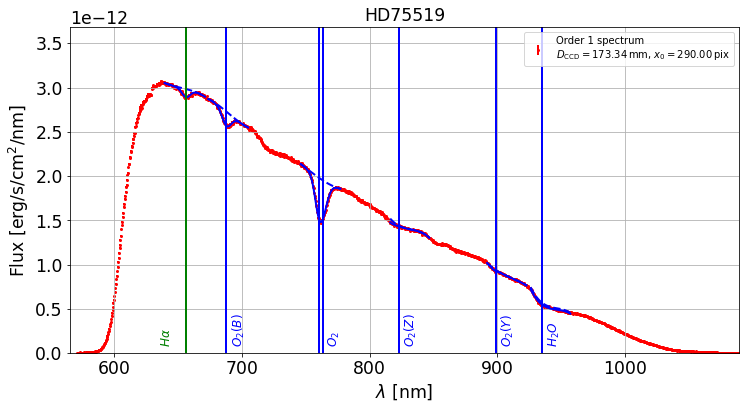

In [76]:
spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)